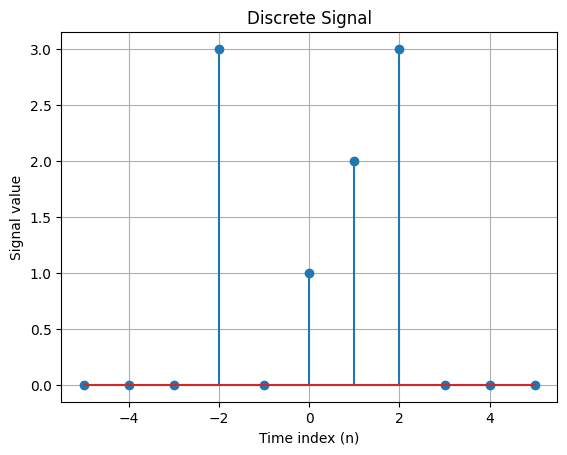

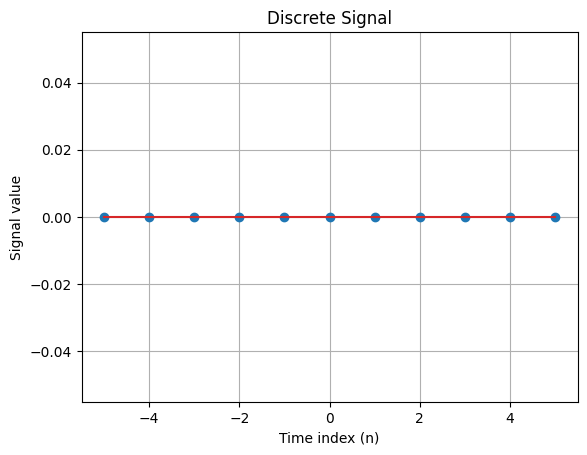

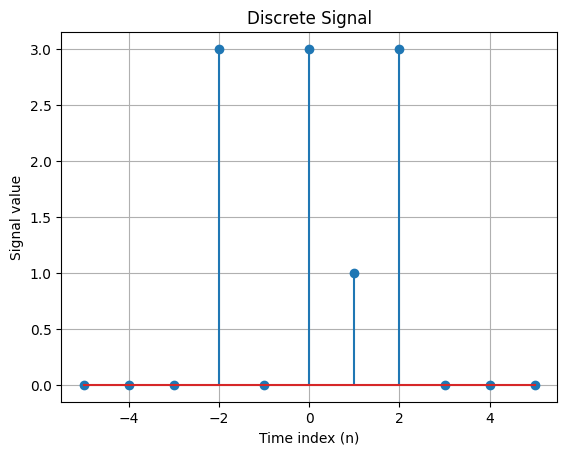

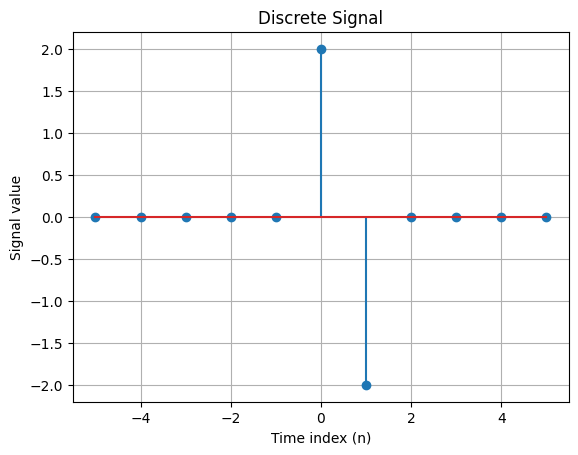

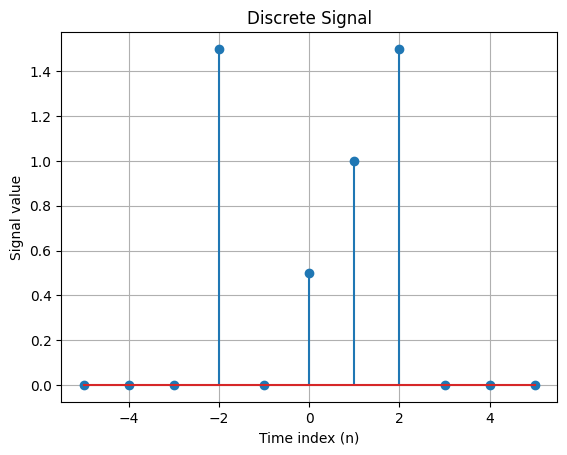

In [6]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteSignal:
    def __init__(self,INF):
        self.INF = INF
        self.values=np.zeros(2*INF+1)
    def set_value_at_time(self,time,value):
        if -self.INF<=time<=self.INF:
            self.values[time+self.INF]=value
        else:
            raise ValueError("Index out of range")
        
    def shift_signal(self,shift):
        shifted_signal=DiscreteSignal(self.INF)
        for i in range(-self.INF,self.INF+1):
            shifted_index=i-shift
            if -self.INF<=shifted_index<=self.INF:
                shifted_signal.set_value_at_time(i,self.values[shifted_index+self.INF])
            return shifted_signal
    
    def add(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values+other.values
        return new_signal
    def multiply(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*other.values
        return new_signal
    
    def multiply_const_factor(self,scaler):
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*scaler
        return new_signal
    
    def plot(self):
        time = np.arange(-self.INF, self.INF+1)
        plt.stem(time, self.values)
        plt.xlabel('Time index (n)')
        plt.ylabel('Signal value')
        plt.title('Discrete Signal')
        plt.grid(True)
        plt.show()
        
    
    # Example usage:
if __name__ == "__main__":
    # Create a discrete signal with a range of -5 to 5
    signal = DiscreteSignal(INF=5)
    
    # Set some signal values
    signal.set_value_at_time(0, 1)
    signal.set_value_at_time(1, 2)
    signal.set_value_at_time(2, 3)
    signal.set_value_at_time(-2, 3)
    # Plot the signal
    signal.plot()

    # Shift the signal
    shifted_signal = signal.shift_signal(1)
    shifted_signal.plot()

    # Add two signals
    signal2 = DiscreteSignal(INF=5)
    signal2.set_value_at_time(0, 2)
    signal2.set_value_at_time(1, -1)
    sum_signal = signal.add(signal2)
    sum_signal.plot()

    # Multiply two signals
    product_signal = signal.multiply(signal2)
    product_signal.plot()

    # Multiply the signal by a constant factor
    scaled_signal = signal.multiply_const_factor(0.5)
    scaled_signal.plot()
    


Original sine wave:


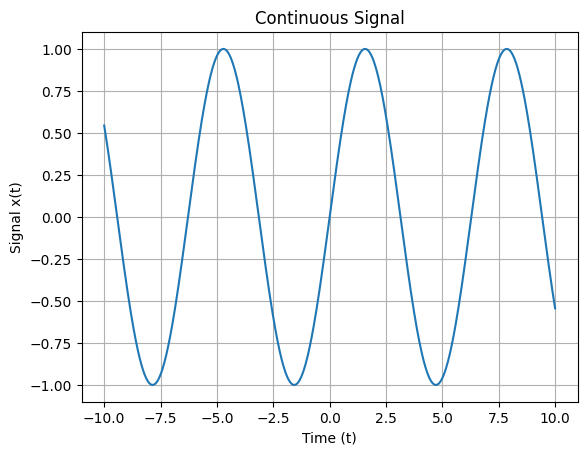

Shifted sine wave:


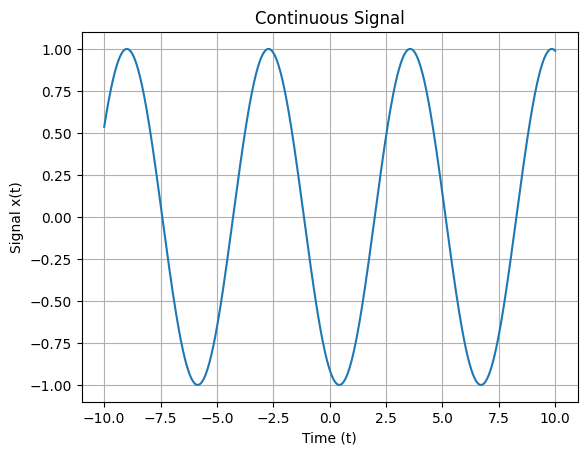

Combined (sine + shifted sine):


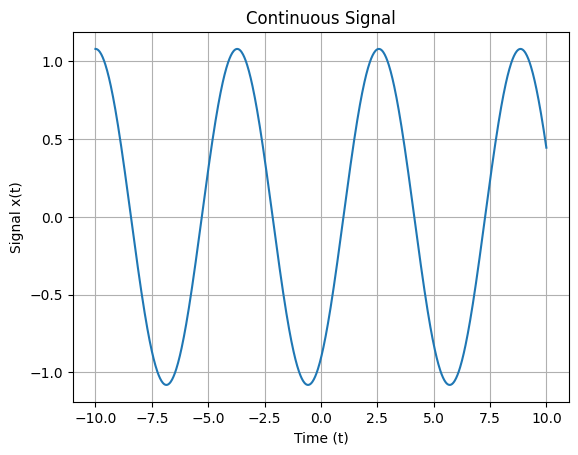

Multiplied (sine * shifted sine):


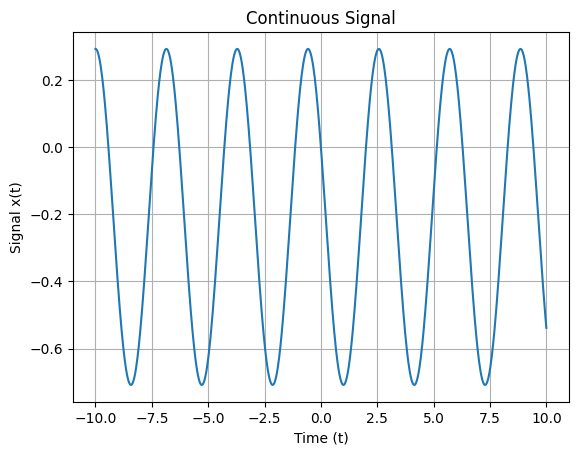

Scaled sine wave (2 * sine):


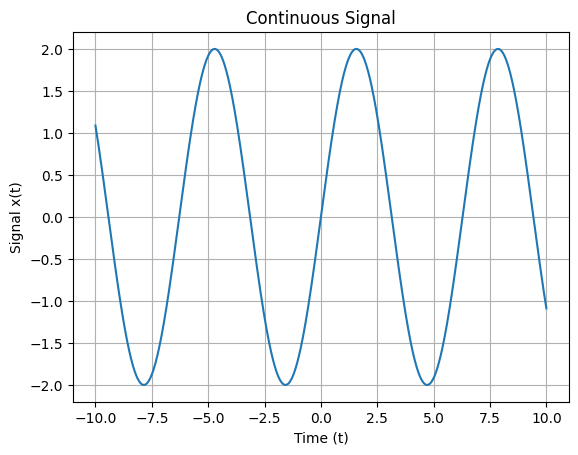

In [7]:
import numpy as np
import matplotlib.pyplot as plt
class ContinuousSignal:
    def __init__(self,func):
        self.func=func
    
    def shift(self,shift):
        return ContinuousSignal(lambda t:self.func(t-shift))
    
    def add(self,other):
        return ContinuousSignal(lambda t:self.func(t)+other.func(t))
    
    def multiply(self,other):
        return ContinuousSignal(lambda t:self.func(t)*other.func(t))
    
    def multiply_const_factor(self,scaler):
        return ContinuousSignal(lambda t:self.func(t)*scaler)
    
    def plot(self,t_range=(-10,10),numpoints=1000,title="Continuous Signal"):
        t = np.linspace(t_range[0], t_range[1], numpoints)
        y_values = self.func(t)
        plt.plot(t, y_values)
        plt.xlabel('Time (t)')
        plt.ylabel('Signal x(t)')
        plt.title(title)
        plt.grid(True)
        plt.show()
        
    # Driver code for testing
if __name__ == "__main__":
    # Define a continuous sine wave signal
    sine_wave = ContinuousSignal(lambda t: np.sin(t))
    
    # Shifted signal
    shifted_sine = sine_wave.shift(2)
    
    # Add two signals (sine + shifted sine)
    combined_signal = sine_wave.add(shifted_sine)
    
    # Multiply two signals (sine * shifted sine)
    multiplied_signal = sine_wave.multiply(shifted_sine)
    
    # Multiply by a constant factor (scaled sine wave)
    scaled_signal = sine_wave.multiply_const_factor(2)
    
    # Plot signals
    print("Original sine wave:")
    sine_wave.plot()
    
    print("Shifted sine wave:")
    shifted_sine.plot()
    
    print("Combined (sine + shifted sine):")
    combined_signal.plot()
    
    print("Multiplied (sine * shifted sine):")
    multiplied_signal.plot()
    
    print("Scaled sine wave (2 * sine):")
    scaled_signal.plot()
        
        
    

In [8]:
import numpy as np

class LTI_Discrete:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Discrete system with a given impulse response.
        
        :param impulse_response: An instance of DiscreteSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        """
        Decomposes the input signal into a linear combination of unit impulses.
        
        :param input_signal: The input discrete signal.
        :return: The unit impulses and their coefficients.
        """
        impulses = []
        coefficients = []
        for i, value in enumerate(input_signal.values):
            if value != 0:
                shift=i-self.impulse_response.INF
                impulses.append(self.impulse_response.shift_signal(shift))
                #impulses.append(i)
                coefficients.append(value)
        return impulses, coefficients

    def output(self, input_signal):
        """
        Finds the output of the LTI system using its impulse response and input signal.
        
        :param input_signal: The input discrete signal.
        :return: The output discrete signal.
        """
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        output_signal = DiscreteSignal(self.impulse_response.INF)#np.zeros_like(input_signal.values)
        for i, coeff in zip(impulses, coefficients):
            shifted_impulse_response = shifted_impulse_response.shift_signal(i)
            output_signal += coeff * shifted_impulse_response
        return output_signal

In [9]:
import numpy as np

class LTI_Continuous:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Continuous system with a given continuous-time impulse response.
        
        :param impulse_response: An instance of ContinuousSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal, delta):
        """
        Decomposes the input continuous signal into a linear combination of impulses of width delta.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of each impulse.
        :return: The impulses and their coefficients.
        """
        t_values = np.arange(-10, 10, delta)  # Sample time values
        coefficient = np.zeros_like(t_values)
        for i, t in enumerate(t_values):
            coefficient[i] = input_signal.func(t) * delta
        return t_values, coefficient

    def output_approx(self, input_signal, delta):
        """
        Approximates the output of the system by first decomposing the input, then using the impulse response.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of the impulses.
        :return: The approximated output continuous signal.
        """
        output_responses = []
        t_values, coefficients = self.linear_combination_of_impulses(input_signal, delta)
        output_signal = np.zeros_like(t_values)
        for i, coeff in enumerate(coefficients):
            shifted_impulse_response = self.impulse_response.func(t_values - t_values[i])
            output_responses.append(coeff*shifted_impulse_response)
            output_signal += coeff * shifted_impulse_response
        return output_signal,output_responses

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Discrete Portion
    impulse_response_discrete = np.array([0, 1, 0.5, 0])  # Example impulse response
    input_signal_discrete = np.array([0, 1, 0, 2])  # Example input signal

    # Create LTI Discrete System
    lti_discrete = LTI_Discrete(impulse_response_discrete)
    output_signal_discrete = lti_discrete.output(input_signal_discrete)

    # Plot Discrete Impulse Response and Output
    plt.subplot(2, 1, 1)
    plt.stem(impulse_response_discrete)
    plt.title("Discrete Impulse Response")

    plt.subplot(2, 1, 2)
    plt.stem(output_signal_discrete)
    plt.title("Discrete Output Signal")

    plt.show()

    # Continuous Portion
    impulse_response_continuous = ContinuousSignal(lambda t: np.exp(-t) * (t >= 0))  # Example impulse response
    input_signal_continuous = ContinuousSignal(lambda t: np.sin(t) * (t >= 0))  # Example input signal

    # Create LTI Continuous System
    lti_continuous = LTI_Continuous(impulse_response_continuous)
    output_signal_continuous = lti_continuous.output_approx(input_signal_continuous, delta=0.01)

    # Plot Continuous Impulse Response and Output
    t_range = np.linspace(-10, 10, 1000)
    plt.subplot(2, 1, 1)
    plt.plot(t_range, impulse_response_continuous.func(t_range))
    plt.title("Continuous Impulse Response")

    plt.subplot(2, 1, 2)
    plt.plot(t_range, output_signal_continuous)
    plt.title("Continuous Output Signal")

    plt.show()

if __name__ == "__main__":
    main()

AttributeError: 'numpy.ndarray' object has no attribute 'values'